## Cluster Analysis in Python Part 1
>Part 1 - Introduction to Clustering
## Unsupervised Learning: Basics
What is unsupervised learning
- A group of machine learning algorithms that find patterns in data
- Data for algorithms has not been labeled, classified or characterized
- The Objective of the algorithm is to interpret any structure in the data
- Common unsupervised learning algorithms: clustering, network analysis, anomaly detection

What is clustering?
- The process of grouping items with similar characteristics
- Items in group similar to each other that in other groups
- Example: distance between points on a 2D plane

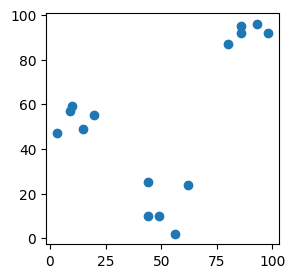

In [6]:
import matplotlib.pyplot as plt
x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]
plt.figure(figsize=(3,3))
plt.scatter(x_coordinates, y_coordinates)
plt.show()

## Basics of cluster analysis
Clustering algorithms:
- Hierarchical clustering
- K means clustering
- Other clustering algorithms: DBSCAN, Gaussian Methods

Hierarchical Clustering in SciPy

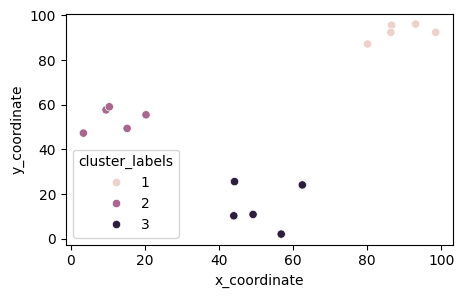

In [11]:
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
                   'y_coordinate': y_coordinates})

Z = linkage(df, method = 'ward')
df['cluster_labels'] = fcluster(Z, 3, criterion = 'maxclust')
plt.figure(figsize=(5,3))
sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='cluster_labels', data=df)
plt.show()

K-Means Clustering in SciPy

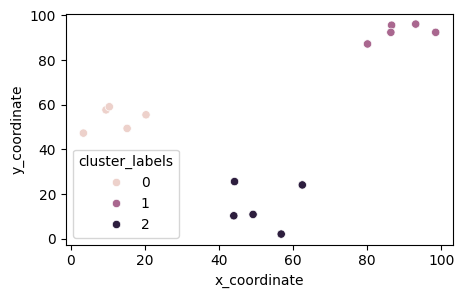

In [17]:
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
import numpy as np
np.random.seed([1000,2000])

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})

centroids,_ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)

plt.figure(figsize=(5,3))
sns.scatterplot(x='x_coordinate', y='y_coordinate',hue='cluster_labels', data = df)
plt.show()

### Exercise - Pokemon sightings: hierarchical clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

In [30]:
data = [[ 9,  8], [ 6,  4], [ 2, 10],[ 3,  6],[ 1,  0],[ 7,  4],[ 1, 10],[ 6, 10],[ 1,  6],[ 7,  1],
           [23, 29],[26, 25],[25, 30],[23, 29],[21, 29],[23, 30],[23, 25],[20, 27],[30, 26],[23, 30]]
df = pd.DataFrame(data, columns=['x', 'y'])

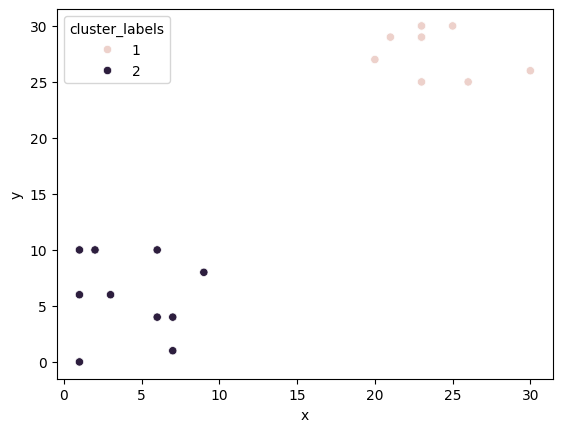

In [31]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df,'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

### Exercise - Pokemon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

In [41]:
data = [[ 9,  8], [ 6,  4], [ 2, 10],[ 3,  6],[ 1,  0],[ 7,  4],[ 1, 10],[ 6, 10],[ 1,  6],[ 7,  1],
           [23, 29],[26, 25],[25, 30],[23, 29],[21, 29],[23, 30],[23, 25],[20, 27],[30, 26],[23, 30]]
df = pd.DataFrame(data, columns=['x', 'y'])
df = df[['x', 'y']].astype(float)

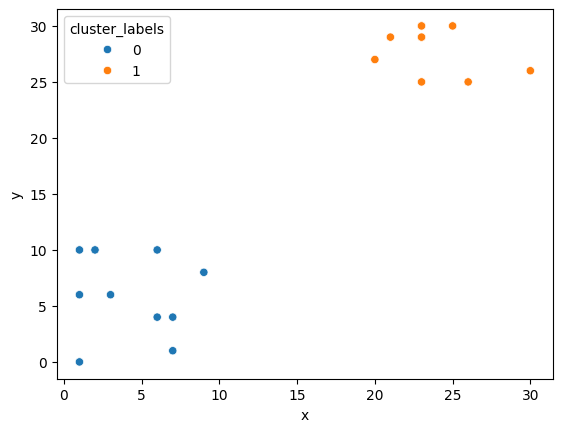

In [42]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

## Data Preparations for Cluster Analysis
Why do we need to prepare data for clustering?
- Variables have incomparable units (product dimensions in cm, price in $)
- Variables with same units have vastly different scales and variances
- Data in raw form may lead to bias in clustering
- Clusters may heavily dependent on one variables
- Solution: Normalization of individual variables

Normalization data
<br>
Normalization: process of rescaling data to a standard deviation of 1
> x_new = x / std_dev(x)

In [21]:
from scipy.cluster.vq import whiten
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)
print(scaled_data.round(2))

[2.73 0.55 1.64 1.64 1.09 1.64 1.64 4.36 0.55 1.09 1.09 1.64 2.73]


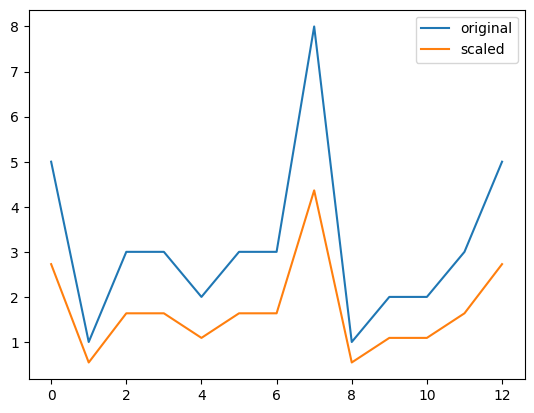

In [22]:
# Import plotting library
from matplotlib import pyplot as plt

# Initialize original, scaled data
plt.plot(data, label="original")
plt.plot(scaled_data,label="scaled")
plt.legend()
plt.show()

### Exercise - Normalization for small numbers
In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt

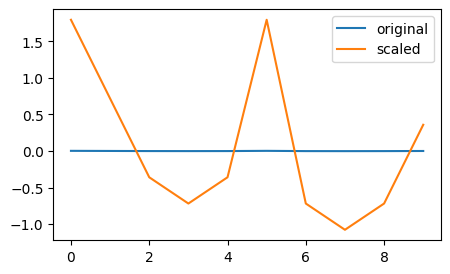

In [45]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.figure(figsize=(5,3))
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()